In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



# from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [256]:
df=pd.read_csv('USA_Housing.csv')
df.duplicated().value_counts()

False    5000
Name: count, dtype: int64

In [213]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


# Removing OUtliers

40026.39797192346


5000

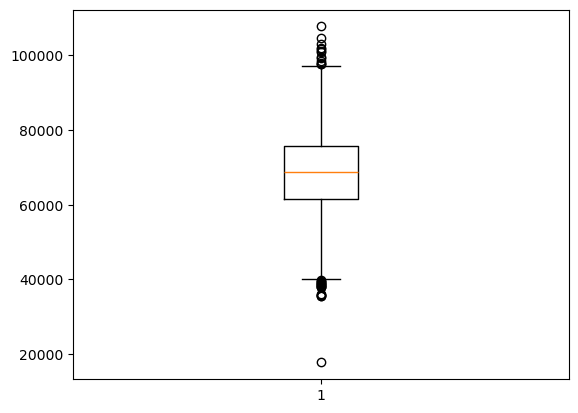

In [248]:
# Avg. Area Income
plt.boxplot(df['Avg. Area Income'])
q1=df['Avg. Area Income'].quantile(0.25)
q3=df['Avg. Area Income'].quantile(0.75)

iqr=q3-q1

lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower)
df1=df[(df['Avg. Area Income']>lower) | (df['Avg. Area Income']<upper)]
len(df1)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [269]:

df=df.select_dtypes(['int','float'])
y=df[['Price']]
x=df

x=x.drop('Price',axis=1)


In [271]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [315]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=1)

In [317]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [319]:
pred=lr.predict(x_test)

In [321]:
score=r2_score(y_test,pred)

In [323]:
print("Accuracy of the Model is :",score)

Accuracy of the Model is : 0.9170905185249427
